<a href="https://colab.research.google.com/github/ameyas1/Gluoncv-Notebooks/blob/master/GluonCV_Pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classification in one line

In [ ]:
!pip install mxnet-cu101mkl

In [ ]:
!pip install gluoncv --upgrade

Requirement already up-to-date: gluoncv in /usr/local/lib/python3.6/dist-packages (0.8.0)


In [ ]:
import gluoncv as gcv
import matplotlib.pyplot as plt
import mxnet as mx 
from mxnet import gluon, nd, image
from mxnet.gluon.data.vision import transforms
from gluoncv import utils
from gluoncv.model_zoo import get_model

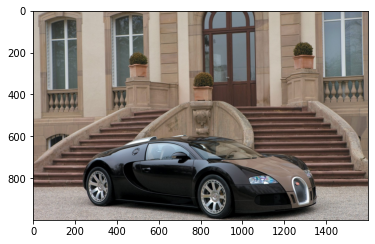

In [ ]:

url = 'https://ai.stanford.edu/~jkrause/cars/car4.jpg'
im_fname = utils.download(url)

img = image.imread(im_fname)

plt.imshow(img.asnumpy())
plt.show()

In [ ]:
print("type: ", img.dtype)
print('minimum: ', img.min().asscalar())
print('maxiimum: ', img.max().asscalar())

type:  <class 'numpy.uint8'>
minimum:  0
maxiimum:  255


In [ ]:
print('shape: ', img.shape)

shape:  (1000, 1600, 3)


In [ ]:
script_url = 'https://gluon-cv.mxnet.io/_downloads/5966af3c5a6133b4f80f4892e25fb82e/demo_imagenet.py'
script_filepath = 'demo_imagenet.py'
gcv.utils.download(url=script_url, path=script_filepath)

2KB [00:00, 617.95KB/s]              


'demo_imagenet.py'

In [ ]:
!python demo_imagenet.py -h

usage: demo_imagenet.py [-h] --model MODEL [--saved-params SAVED_PARAMS]
                        --input-pic INPUT_PIC

Predict ImageNet classes from a given image

optional arguments:
  -h, --help            show this help message and exit
  --model MODEL         name of the model to use
  --saved-params SAVED_PARAMS
                        path to the saved model parameters
  --input-pic INPUT_PIC
                        path to the input picture


In [ ]:
!python demo_imagenet.py --model ResNet50_v1d --input-pic /content/car4.jpg

55464KB [00:01, 37178.95KB/s]               
The input picture is classified to be
	[sports car], with probability 0.777.
	[convertible], with probability 0.047.
	[car wheel], with probability 0.016.
	[racer], with probability 0.011.
	[grille], with probability 0.008.


Image Classification step by step

In [ ]:
img = gcv.data.transforms.presets.imagenet.transform_eval(img)

In [ ]:
print('shape: ', img.shape)
print("type: ", img.dtype)
print('minimum: ', img.min().asscalar())
print('maxiimum: ', img.max().asscalar())

shape:  (1, 3, 224, 224)
type:  <class 'numpy.float32'>
minimum:  -2.117904
maxiimum:  2.64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


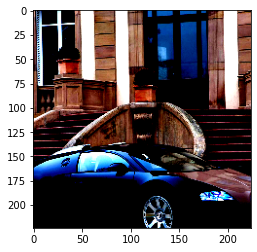

In [ ]:
plt.imshow(nd.transpose(nd.squeeze(img), (1,2,0)).asnumpy())
plt.show()

In [ ]:
network = get_model('ResNet50_v1d', pretrained=True)

In [ ]:
predictions = network(img)

In [ ]:
predictions.shape

(1, 1000)

In [ ]:
predictions = predictions[0]

In [ ]:
prob =nd.softmax(predictions)

In [ ]:
k=5
topk_ind = nd.topk(prob,k=k)

In [ ]:
topk_ind


[817. 511. 479. 751. 581.]
<NDArray 5 @cpu(0)>

In [ ]:
print('The input picture is classified to be')
for i in range(k):
  class_index = topk_ind[i].astype('int').asscalar()
  class_label = network.classes[class_index]
  class_prob = prob[class_index]
  print('[%s], with probability %.3f.'%
          (class_label, class_prob.asscalar()*100))

The input picture is classified to be
[sports car], with probability 77.706.
[convertible], with probability 4.710.
[car wheel], with probability 1.589.
[racer], with probability 1.080.
[grille], with probability 0.802.


object Detection

63KB [00:02, 25.95KB/s]                        


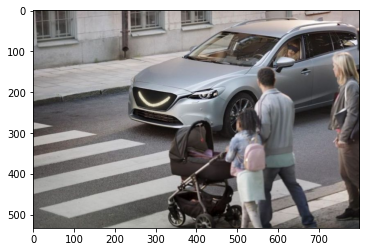

In [ ]:
url = 'https://img.futurecar.com/201903/07/l_5c81e02750b59.jpg'
im_fname = utils.download(url)

img = image.imread(im_fname)

plt.imshow(img.asnumpy())
plt.show()

In [ ]:
print('shape: ', img.shape)
print("type: ", img.dtype)
print('minimum: ', img.min().asscalar())
print('maxiimum: ', img.max().asscalar())

shape:  (533, 800, 3)
type:  <class 'numpy.uint8'>
minimum:  0
maxiimum:  255


In [ ]:
img, chw_img = gcv.data.transforms.presets.yolo.transform_test(img, short=512)
print('shape: ', img.shape)
print("type: ", img.dtype)
print('minimum: ', img.min().asscalar())
print('maxiimum: ', img.max().asscalar())

shape:  (1, 3, 512, 768)
type:  <class 'numpy.float32'>
minimum:  -2.117904
maxiimum:  2.64


In [ ]:
print('shape: ', chw_img.shape)
print("type: ", chw_img.dtype)
print('minimum: ', chw_img.min())
print('maxiimum: ', chw_img.max())

shape:  (512, 768, 3)
type:  uint8
minimum:  0
maxiimum:  255


In [ ]:
type(chw_img)

numpy.ndarray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


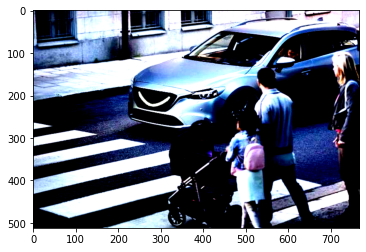

In [ ]:
plt.imshow(nd.transpose(nd.squeeze(img), (1,2,0)).asnumpy())
plt.show()

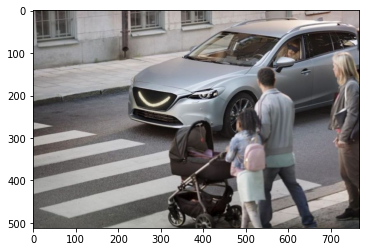

In [ ]:
plt.imshow(chw_img)
plt.show()

In [ ]:
net = gcv.model_zoo.get_model('yolo3_darknet53_coco', pretrained=True)

100%|██████████| 224190/224190 [00:03<00:00, 59126.27KB/s]


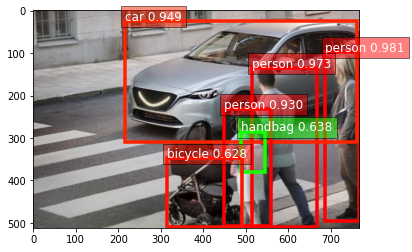

In [ ]:
class_IDs, scores, bounding_boxs = net(img)

ax = utils.viz.plot_bbox(chw_img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

In [ ]:
pred = net(img)

In [ ]:
for ind,arr in enumerate(pred):
  print("{} shape: {}".format(ind+1, arr.shape))

1 shape: (1, 100, 1)
2 shape: (1, 100, 1)
3 shape: (1, 100, 4)


In [ ]:
type(pred)

tuple

In [ ]:
class_inds, probs, bounding_boxes = [arr[0] for arr in pred]

In [ ]:
k=10
class_inds[:k]


[[ 0.]
 [ 0.]
 [ 2.]
 [ 0.]
 [26.]
 [ 1.]
 [24.]
 [ 0.]
 [24.]
 [26.]]
<NDArray 10x1 @cpu(0)>

In [ ]:
probs[:k]


[[0.98094904]
 [0.97278744]
 [0.94926417]
 [0.9296846 ]
 [0.63824284]
 [0.62765664]
 [0.43314502]
 [0.19515277]
 [0.15643916]
 [0.08518739]]
<NDArray 10x1 @cpu(0)>

In [ ]:
bounding_boxes[:k]


[[688.096     97.75273  767.41583  495.46112 ]
 [515.18787  135.2688   668.9507   510.60333 ]
 [216.91373   24.259048 762.8911   310.32092 ]
 [448.23065  232.48767  559.6425   508.97632 ]
 [490.55368  285.14166  546.4406   379.68506 ]
 [315.8032   348.21625  491.43546  509.16168 ]
 [321.23032  259.97626  425.86734  391.40753 ]
 [594.344     66.92604  631.6366   118.68773 ]
 [491.24094  296.90805  546.36365  379.7933  ]
 [321.23032  259.97626  425.86734  391.40753 ]]
<NDArray 10x4 @cpu(0)>

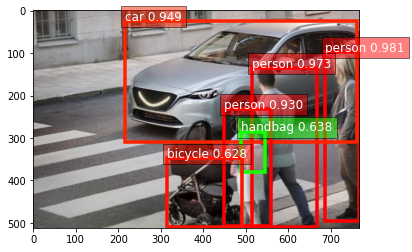

In [ ]:
ax = utils.viz.plot_bbox(chw_img, bounding_boxes, probs,
                         class_inds, class_names=net.classes)
plt.show()

Image Segmentation

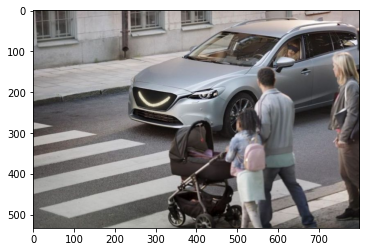

In [ ]:
url = 'https://img.futurecar.com/201903/07/l_5c81e02750b59.jpg'
im_fname = utils.download(url)

img = image.imread(im_fname)

plt.imshow(img.asnumpy())
plt.show()

In [ ]:
transform_fn = transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize([.485,.456,.406],[.229,.224,.225])
])

In [ ]:
img = transform_fn(img)
print('shape: ', img.shape)
print("type: ", img.dtype)
print('minimum: ', img.min().asscalar())
print('maxiimum: ', img.max().asscalar())

shape:  (3, 533, 800)
type:  <class 'numpy.float32'>
minimum:  -2.117904
maxiimum:  2.64


In [ ]:
img = img.expand_dims(0)

In [ ]:
img.shape

(1, 3, 533, 800)

In [ ]:
net = gcv.model_zoo.get_model('fcn_resnet50_ade', pretrained=True)

57418KB [00:01, 49331.70KB/s]                           


128832KB [00:02, 58537.22KB/s]                            


In [ ]:
out = net.demo(img)

/usr/local/lib/python3.6/dist-packages/gluoncv/model_zoo/segbase.py:107: UserWarning: demo method will be deprecated in favor of predict.
  warnings.warn('demo method will be deprecated in favor of predict.')


In [ ]:
out.shape

(1, 150, 533, 800)

In [ ]:
out=out[0]

In [ ]:
from gluoncv.data.ade20k.segmentation import ADE20KSegmentation
# class_label = ADE20KSegmentation.CLASSES

In [ ]:
prob = nd.softmax(out, axis=0)

In [ ]:
ADE20KSegmentation.CLASSES[12]

'person, individual, someone, somebody, mortal, soul'

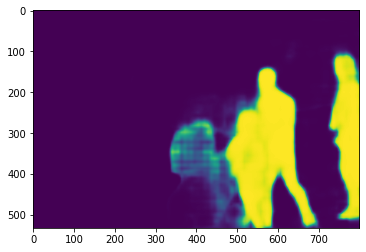

In [ ]:
out_heatmap = prob[12]
plt.imshow(out_heatmap.asnumpy())

In [ ]:
pred = nd.argmax(out, axis=0).asnumpy()
pred.shape

(533, 800)

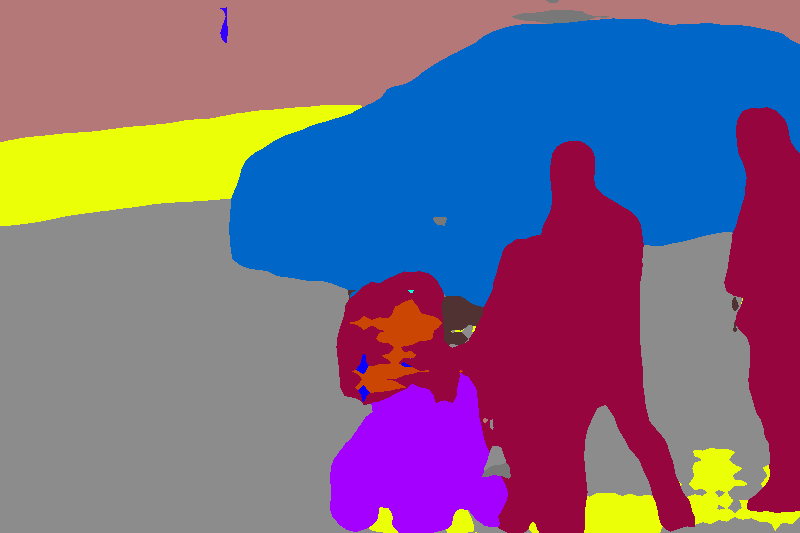

In [ ]:
from gluoncv.utils.viz import get_color_pallete

pred_img = get_color_pallete(pred,'ade20k')
pred_img

In [ ]:
ADE20KSegmentation.CLASSES

('wall',
 'building, edifice',
 'sky',
 'floor, flooring',
 'tree',
 'ceiling',
 'road, route',
 'bed',
 'windowpane, window',
 'grass',
 'cabinet',
 'sidewalk, pavement',
 'person, individual, someone, somebody, mortal, soul',
 'earth, ground',
 'door, double door',
 'table',
 'mountain, mount',
 'plant, flora, plant life',
 'curtain, drape, drapery, mantle, pall',
 'chair',
 'car, auto, automobile, machine, motorcar',
 'water',
 'painting, picture',
 'sofa, couch, lounge',
 'shelf',
 'house',
 'sea',
 'mirror',
 'rug, carpet, carpeting',
 'field',
 'armchair',
 'seat',
 'fence, fencing',
 'desk',
 'rock, stone',
 'wardrobe, closet, press',
 'lamp',
 'bathtub, bathing tub, bath, tub',
 'railing, rail',
 'cushion',
 'base, pedestal, stand',
 'box',
 'column, pillar',
 'signboard, sign',
 'chest of drawers, chest, bureau, dresser',
 'counter',
 'sand',
 'sink',
 'skyscraper',
 'fireplace, hearth, open fireplace',
 'refrigerator, icebox',
 'grandstand, covered stand',
 'path',
 'stairs, 

Pose Estimation

In [ ]:
from gluoncv import model_zoo, data, utils
from gluoncv.data.transforms.pose import detector_to_alpha_pose, heatmap_to_coord_alpha_pose

In [ ]:
detector = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)
pose_net = model_zoo.get_model('alpha_pose_resnet101_v1b_coco', pretrained=True)

# Note that we can reset the classes of the detector to only include
# human, so that the NMS process is faster.

detector.reset_class(["person"], reuse_weights=['person'])

88993KB [00:01, 56042.81KB/s]                           


216179KB [00:03, 62800.99KB/s]                            


28KB [00:00, 1780.72KB/s]             

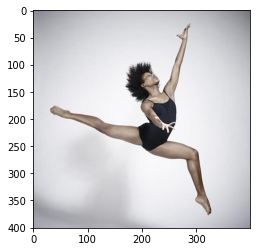

In [ ]:
url = 'https://chesapeakearts.showare.com/uplimage/FULLCIRCLEDANCE.jpg'
im_fname = utils.download(url)

img = image.imread(im_fname)

plt.imshow(img.asnumpy())
plt.show()

In [ ]:
print('shape: ', img.shape)
print("type: ", img.dtype)
print('minimum: ', img.min().asscalar())
print('maxiimum: ', img.max().asscalar())

shape:  (401, 400, 3)
type:  <class 'numpy.uint8'>
minimum:  0
maxiimum:  255


In [ ]:
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)

In [ ]:
print('shape: ', img.shape)
print("type: ", img.dtype)
print('minimum: ', img.min())
print('maxiimum: ', img.max())

shape:  (513, 512, 3)
type:  uint8
minimum:  0
maxiimum:  255


In [ ]:
print('shape: ', x.shape)
print("type: ", x.dtype)
print('minimum: ', x.min().asscalar())
print('maxiimum: ', x.max().asscalar())

shape:  (1, 3, 513, 512)
type:  <class 'numpy.float32'>
minimum:  -2.117904
maxiimum:  2.64


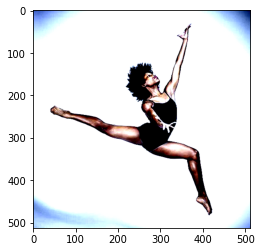

In [ ]:
plt.imshow(nd.transpose(nd.squeeze(x), (1,2,0)).asnumpy())
plt.show()

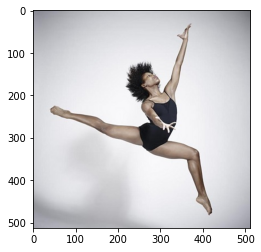

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
class_IDs, scores, bounding_boxs = detector(x)

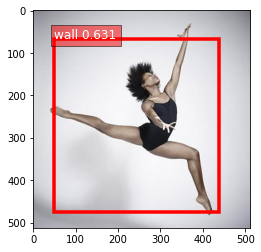

In [ ]:
ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

In [ ]:
pose_input, upscale_bbox = detector_to_alpha_pose(img, class_IDs, scores, bounding_boxs)

In [ ]:
print('shape: ', pose_input.shape)
print("type: ", pose_input.dtype)
print('minimum: ', pose_input.min().asscalar())
print('maxiimum: ', pose_input.max().asscalar())

shape:  (1, 3, 256, 192)
type:  <class 'numpy.float32'>
minimum:  -0.48
maxiimum:  0.594


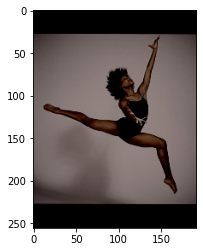

In [ ]:
plt.imshow(nd.transpose(nd.squeeze(pose_input), (1,2,0)).asnumpy())
plt.show()

In [ ]:
print('shape: ', upscale_bbox.shape)
print("type: ", upscale_bbox.dtype)
print('minimum: ', upscale_bbox.min())
print('maxiimum: ', upscale_bbox.max())

shape:  (1, 4)
type:  float64
minimum:  11.0
maxiimum:  512.0


In [ ]:
predicted_heatmap = pose_net(pose_input)
pred_coords, confidence = heatmap_to_coord_alpha_pose(predicted_heatmap, upscale_bbox)

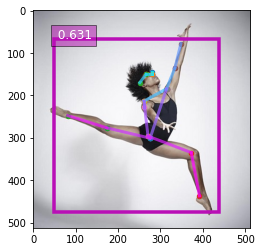

In [ ]:
ax = utils.viz.plot_keypoints(img, pred_coords, confidence,
                              class_IDs, bounding_boxs, scores,
                              box_thresh=0.5, keypoint_thresh=0.2)
plt.show()

Action Recognition

In [ ]:
!pip install decord

     |████████████████████████████████| 11.8MB 3.3MB/s 


In [ ]:
from gluoncv.data.transforms import video

In [ ]:
from gluoncv.utils.filesystem import try_import_decord
decord = try_import_decord()

url = 'https://github.com/bryanyzhu/tiny-ucf101/raw/master/abseiling_k400.mp4'
video_fname = utils.download(url)

100%|██████████| 782/782 [00:00<00:00, 8377.92KB/s]


In [ ]:
vr = decord.VideoReader(video_fname)

In [ ]:
type(vr)

decord.video_reader.VideoReader

In [ ]:
frame_id_list = range(0, 64, 2)
frame_id_list

range(0, 64, 2)

In [ ]:
video_data = vr.get_batch(frame_id_list).asnumpy()


In [ ]:
video_data.shape

(32, 256, 454, 3)

In [ ]:
clip_input = [video_data[vid, :, :, :] for vid, _ in enumerate(frame_id_list)]

In [ ]:
import numpy as np

In [ ]:
transform_fn = video.VideoGroupValTransform(size=224, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
clip_input = transform_fn(clip_input)
clip_input = np.stack(clip_input, axis=0)
clip_input = clip_input.reshape((-1,) + (32, 3, 224, 224))
clip_input = np.transpose(clip_input, (0, 2, 1, 3, 4))
print('Video data is downloaded and preprocessed.')

Video data is downloaded and preprocessed.


In [ ]:
model_name = 'i3d_inceptionv1_kinetics400'
net = get_model(model_name, nclass=400, pretrained=True)
print('%s model is successfully loaded.' % model_name)

51278KB [00:00, 56432.14KB/s]                           


i3d_inceptionv1_kinetics400 model is successfully loaded.


In [ ]:
pred = net(nd.array(clip_input))

classes = net.classes
topK = 5
ind = nd.topk(pred, k=topK)[0].astype('int')
print('The input video clip is classified to be')
for i in range(topK):
    print('\t[%s], with probability %.3f.'%
          (classes[ind[i].asscalar()], nd.softmax(pred)[0][ind[i]].asscalar()))

The input video clip is classified to be
	[abseiling], with probability 0.991.
	[rock_climbing], with probability 0.009.
	[ice_climbing], with probability 0.000.
	[paragliding], with probability 0.000.
	[skydiving], with probability 0.000.


Depth Prediction

In [ ]:
ctx = mx.cpu(0)

In [ ]:
url = 'https://raw.githubusercontent.com/KuangHaofei/GluonCV_Test/master/monodepthv2/tutorials/test_img.png'
filename = 'test_img.png'
utils.download(url, filename, True)

729KB [00:00, 7875.10KB/s]             


'test_img.png'

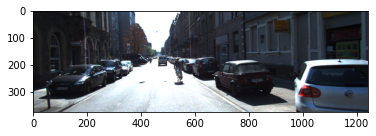

In [ ]:
import PIL.Image as pil
img = pil.open(filename).convert('RGB')

from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

In [ ]:
original_width, original_height = img.size
feed_height = 192
feed_width = 640

img = img.resize((feed_width, feed_height), pil.LANCZOS)
img = transforms.ToTensor()(mx.nd.array(img)).expand_dims(0).as_in_context(context=ctx)

In [ ]:
model = model_zoo.get_model('monodepth2_resnet18_kitti_stereo_640x192',
                                    pretrained_base=False, ctx=ctx, pretrained=True)

70344KB [00:02, 26620.11KB/s]                           


In [ ]:
outputs = model.predict(img)
disp = outputs[("disp", 0)]
disp_resized = mx.nd.contrib.BilinearResize2D(disp, height=original_height, width=original_width)

In [ ]:
disp_resized.shape

(1, 1, 375, 1242)

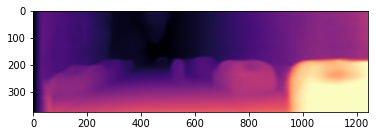

In [ ]:
import matplotlib as mpl
import matplotlib.cm as cm
disp_resized_np = disp_resized.squeeze().as_in_context(mx.cpu()).asnumpy()
vmax = np.percentile(disp_resized_np, 95)
normalizer = mpl.colors.Normalize(vmin=disp_resized_np.min(), vmax=vmax)
mapper = cm.ScalarMappable(norm=normalizer, cmap='magma')
colormapped_im = (mapper.to_rgba(disp_resized_np)[:, :, :3] * 255).astype(np.uint8)
im = pil.fromarray(colormapped_im)
im.save('test_output.png')

import matplotlib.image as mpimg
disp_map = mpimg.imread('test_output.png')
plt.imshow(disp_map)
plt.show()